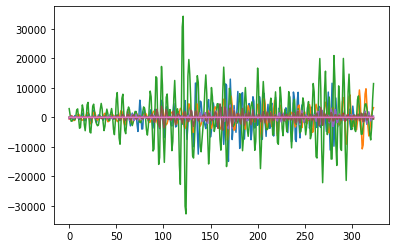

In [65]:
#单变量，1---》1 

import numpy
import pandas
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.python.keras.layers import ConvLSTM2D
from tensorflow.python.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#matplotlib inline
import time
start = time.time()
# load the dataset
#dataframe = read_csv('C:/Users/Administrator/Desktop/XI-2/data/PD-IMF1.csv', usecols=[6], engine='python')
dataframe = read_csv('C:/Users/Administrator/Desktop/XI-2/data/PD.csv',usecols=[6], engine='python')
# print(dataframe)
#print("数据集的长度：",len(dataframe))
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


# X是给定时间(t)的乘客人数，Y是下一次(t + 1)的乘客人数。
# 将值数组转换为数据集矩阵,look_back是步长。
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i+look_back), 0]
        # X按照顺序取值
        dataX.append(a)
        # Y向后移动一位取值
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)



# 数据缩放
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# 将数据拆分成训练和测试，7/9作为训练数据
train_size = int(len(dataset) * 0.78)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("原始训练集的长度：",train_size)
print("原始测试集的长度：",test_size)



# 构建监督学习型数据
look_back = 6
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 
print("转为监督学习，训练集数据长度：", len(trainX))
# print(trainX,trainY)
print("转为监督学习，测试集数据长度：",len(testX))
# print(testX, testY )
# 数据重构为5D [samples, timesteps, rows, columns, features]
#trainX = numpy.reshape(trainX, (trainX.shape[0], 2,1,3, trainX.shape[1]))
#testX = numpy.reshape(testX, (testX.shape[0],2, 1,3, testX.shape[1]))
trainX = numpy.reshape(trainX, (trainX.shape[0], 2,1,3,7))
testX = numpy.reshape(testX, (testX.shape[0],2, 1,3,7))
print('构造得到模型的输入数据(训练数据已有标签trainY): ',trainX.shape,testX.shape)

# create and fit the LSTM network
model = Sequential()
model.add(ConvLSTM2D(filters=128, kernel_size=(1,1), activation='relu', input_shape=(2,1,3,7)))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=30)

# 打印模型
model.summary()

# 开始预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 逆缩放预测值
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算误差
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2):len(dataset), :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

end = time.time()
print('Running time: %d seconds'%(end - start))

数据集的长度： 114


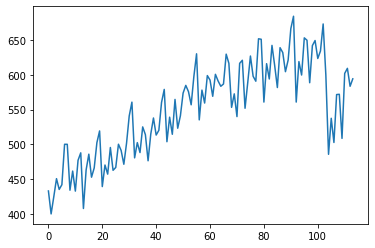

原始训练集的长度： 76
原始测试集的长度： 38
转为监督学习，训练集数据长度： 72
[[0.11611533 0.         0.08726251]
 [0.         0.08726251 0.17839551]
 [0.08726251 0.17839551 0.12385643]
 [0.17839551 0.12385643 0.14778316]
 [0.12385643 0.14778316 0.35221672]
 [0.14778316 0.35221672 0.35221672]
 [0.35221672 0.35221672 0.11998594]
 [0.35221672 0.11998594 0.21674871]
 [0.11998594 0.21674871 0.11541164]
 [0.21674871 0.11541164 0.2712878 ]
 [0.11541164 0.2712878  0.30893743]
 [0.2712878  0.30893743 0.02744544]
 [0.30893743 0.02744544 0.22273052]
 [0.02744544 0.22273052 0.30225194]
 [0.22273052 0.30225194 0.1857847 ]
 [0.30225194 0.1857847  0.23258269]
 [0.1857847  0.23258269 0.3606615 ]
 [0.23258269 0.3606615  0.4197749 ]
 [0.3606615  0.4197749  0.1382829 ]
 [0.4197749  0.1382829  0.24736106]
 [0.1382829  0.24736106 0.20126677]
 [0.24736106 0.20126677 0.33603096]
 [0.20126677 0.33603096 0.22061932]
 [0.33603096 0.22061932 0.23504579]
 [0.22061932 0.23504579 0.35256863]
 [0.23504579 0.35256863 0.3209008 ]
 [0.35256863 0.3209

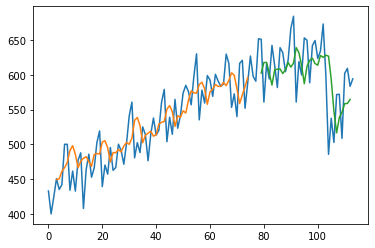

In [4]:
#单变量，3---》1 

import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.python.keras.layers import ConvLSTM2D
from tensorflow.python.keras.layers import Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
#matplotlib inline

# load the dataset
dataframe = read_csv('C:/Users/Administrator/Desktop/XI-2/data/Hong Kong airplane data144.csv', usecols=[0], engine='python')
# print(dataframe)
print("数据集的长度：",len(dataframe))
dataset = dataframe.values
# 将整型变为float
dataset = dataset.astype('float32')

plt.plot(dataset)
plt.show()


# X是给定时间(t)的乘客人数，Y是下一次(t + 1)的乘客人数。
# 将值数组转换为数据集矩阵,look_back是步长。
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        # X按照顺序取值
        dataX.append(a)
        # Y向后移动一位取值
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

# fix random seed for reproducibility
numpy.random.seed(7)


# 数据缩放
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)


# 将数据拆分成训练和测试，2/3作为训练数据
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print("原始训练集的长度：",train_size)
print("原始测试集的长度：",test_size)



# 构建监督学习型数据
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back) 
print("转为监督学习，训练集数据长度：", len(trainX))
print(trainX,trainY)
print("转为监督学习，测试集数据长度：",len(testX))
print(testX, testY )
# 数据重构为5D [samples, timesteps, rows, columns, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 3,1,1, 1))
testX = numpy.reshape(testX, (testX.shape[0],3, 1,1, 1))
print('构造得到模型的输入数据(训练数据已有标签trainY): ',trainX.shape,testX.shape)

# create and fit the LSTM network
model = Sequential()
model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(3, 1,1, 1)))
model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse', optimizer='adam')
model.fit(trainX, trainY, epochs=50)

# 打印模型
model.summary()

# 开始预测
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# 逆缩放预测值
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# 计算误差
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [3]:
print(trainX)
print('----------')
print(testX)

[[[[[0.11611533]]]


  [[[0.        ]]]


  [[[0.08726251]]]]



 [[[[0.        ]]]


  [[[0.08726251]]]


  [[[0.17839551]]]]



 [[[[0.08726251]]]


  [[[0.17839551]]]


  [[[0.12385643]]]]



 [[[[0.17839551]]]


  [[[0.12385643]]]


  [[[0.14778316]]]]



 [[[[0.12385643]]]


  [[[0.14778316]]]


  [[[0.35221672]]]]



 [[[[0.14778316]]]


  [[[0.35221672]]]


  [[[0.35221672]]]]



 [[[[0.35221672]]]


  [[[0.35221672]]]


  [[[0.11998594]]]]



 [[[[0.35221672]]]


  [[[0.11998594]]]


  [[[0.21674871]]]]



 [[[[0.11998594]]]


  [[[0.21674871]]]


  [[[0.11541164]]]]



 [[[[0.21674871]]]


  [[[0.11541164]]]


  [[[0.2712878 ]]]]



 [[[[0.11541164]]]


  [[[0.2712878 ]]]


  [[[0.30893743]]]]



 [[[[0.2712878 ]]]


  [[[0.30893743]]]


  [[[0.02744544]]]]



 [[[[0.30893743]]]


  [[[0.02744544]]]


  [[[0.22273052]]]]



 [[[[0.02744544]]]


  [[[0.22273052]]]


  [[[0.30225194]]]]



 [[[[0.22273052]]]


  [[[0.30225194]]]


  [[[0.1857847 ]]]]



 [[[[0.30225194]]]


  [[